In [1]:
'''
Clase 14/10/19
'''

import numpy as np
from matplotlib import pyplot as plt
import scipy.signal as signal


In [11]:
def histogram(s, nbins=10, width=.5):
    intervals = np.linspace( s.min(), s.max(), nbins+1 )
    
    left = s[:, np.newaxis] > intervals[:-1][np.newaxis]
    right = s[:, np.newaxis] < intervals[1:][np.newaxis]
    
    hist = (left*right).sum(axis=0)
    plt.bar(intervals[:-1], hist, width)
    plt.grid()
    
    return intervals[:-1], hist

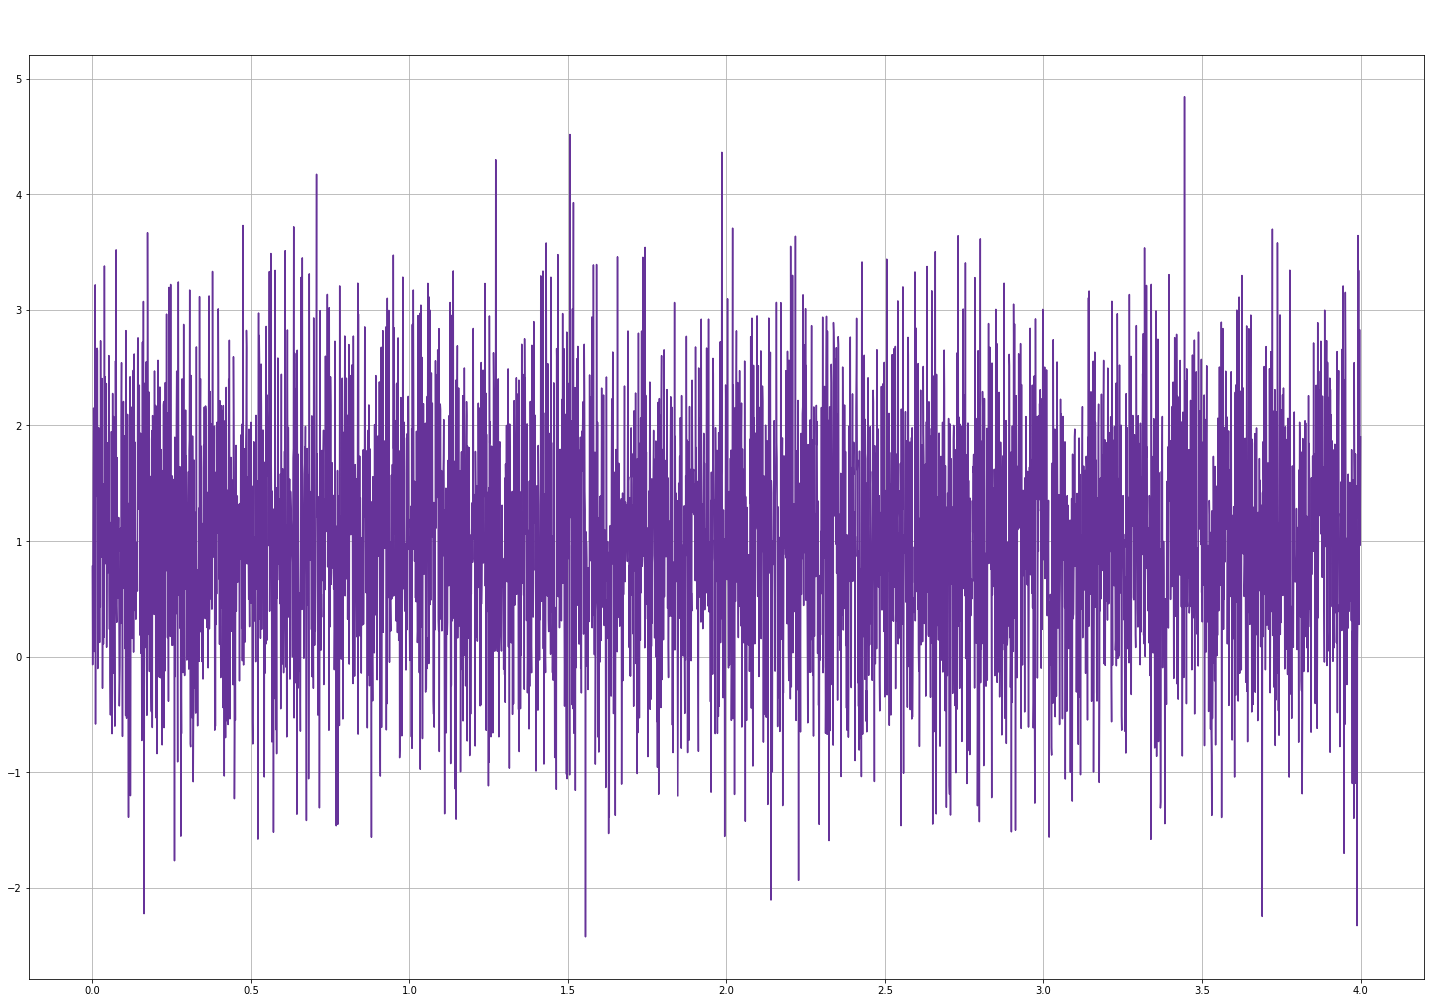

In [9]:
noise = np.random.normal(1,1,4000)
t = np.linspace(0,4,4000)


plt.figure( figsize=(25,17) )
plt.plot(t,noise, color='rebeccapurple')
plt.title('Ruido aleatorio Gaussiano', size=50).set_color('w')
plt.grid()
plt.show()

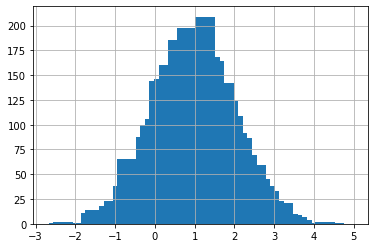

In [20]:
nbins = np.sqrt(noise.shape[0])
intervals, hist = histogram(noise, nbins=nbins)


In [23]:
def abre(path, file_name):
    data = np.loadtxt(path+file_name, delimiter='\t', dtype='str')
    data = data[:-1,:-1].T.astype('float') #Elimina la última fila y columna que no contienen nada
    
    return data

path = '/home/edu/Documentos/GitHub/MCIB-19-P-Edu/data/P1/' #Cambiar dependiendo de la compu
file = 'Apnea1.txt'


signals = abre(path,file)

EKG = signals[1]
EMG = signals[3]

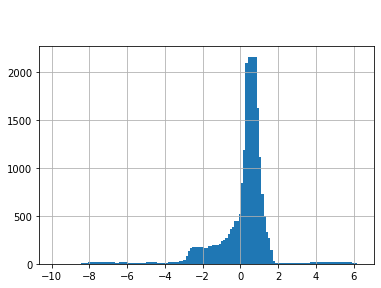

In [31]:
EKGinter, EKGh = histogram( EKG, nbins=(np.sqrt( EKG.shape[0] ) ) )
plt.title('EKG', size=40).set_color('w')


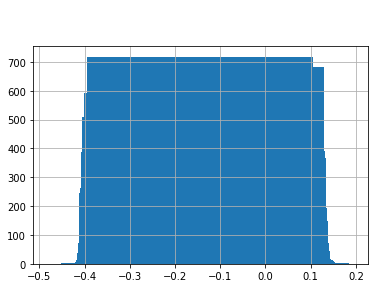

In [32]:
EMGinter, EMGh = histogram( EMG, nbins=(np.sqrt(EMG.shape[0])) )
plt.title('EMG', size=40).set_color('w')

In [36]:
def segments(s, L=11):
    LEN = s.shape[0]
    segment = []
    for i in range(LEN-L):
        ep = s[i:i+L]
        segment.append(ep)
    segment = np.array(segment)
    return segment.copy()

In [43]:
def gauss_w(sr, L=11):
    n = np.arange(L) - L//2
    n = n/sr
    g = 1/np.sqrt(2*np.pi) * np.exp(-.5*n**2)
    return g

In [51]:
sr = 1000
w = gauss_w(sr,L=11)
s_g = np.dot(segs,w)/L

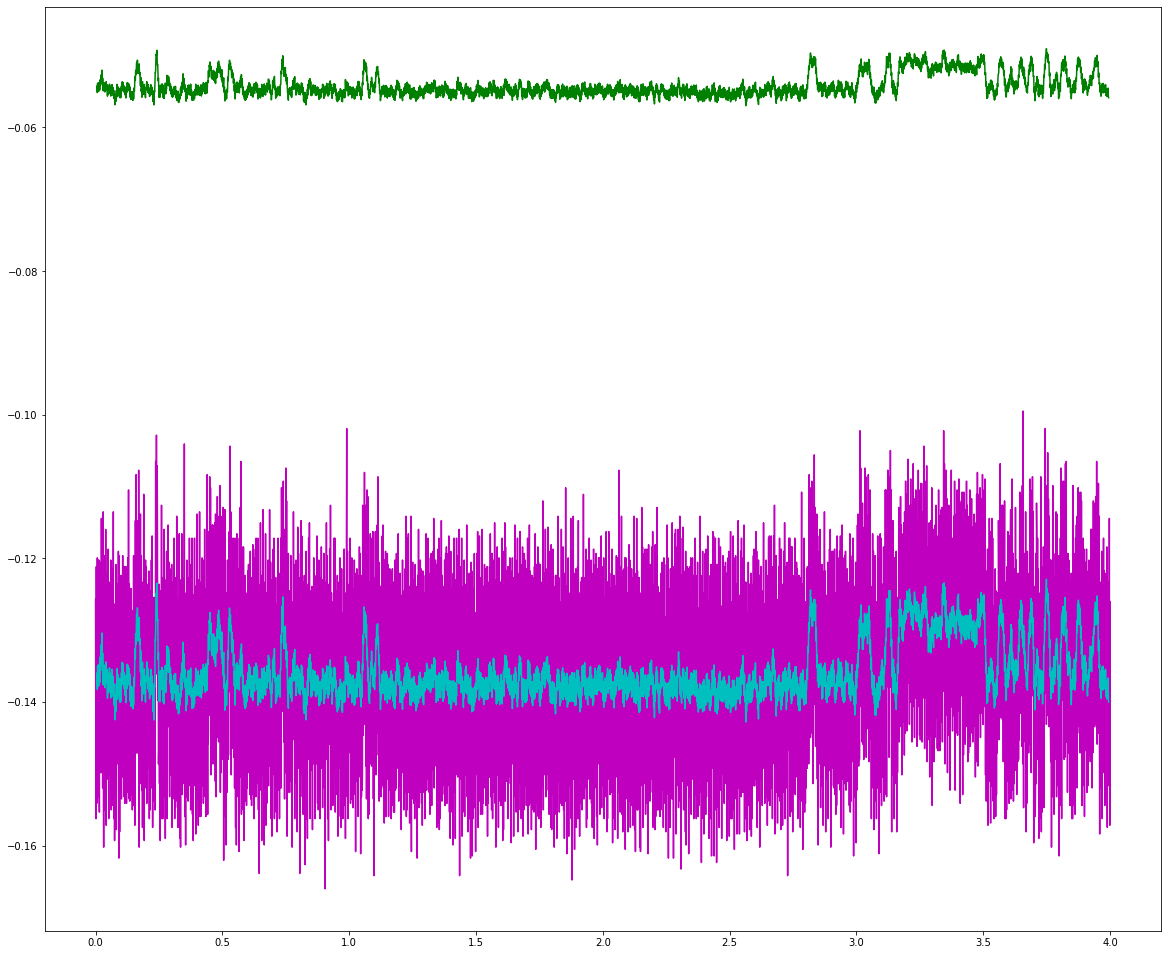

In [52]:
L = 11
s = EMG[4000:8000]
segs = segments(s,L)
s_mean = segs.mean(axis=1)

plt.figure( figsize=(20,17) )
plt.plot(t, s, 'm')
plt.plot(t[L//2:-L//2], s_mean, 'c')
plt.plot(t[L//2:-L//2], s_g, 'g')
plt.show()